# Part 1


In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [26]:
file = "./data/ssm.txt"

column_names = [
    "M/Msun",
    "R/Rsun",
    "T",
    "Rho",
    "P",
    "L/Lsun",
    "X",
    "Y(He4)",
    "He3",
    "C12",
    "N14",
    "O16",
]

MASS_COLUMN = column_names[0]
RADIUS_COLUMN = column_names[1]
TEMPERATURE_COLUMN = column_names[2]
DENSITY_COLUMN = column_names[3]
PRESSURE_COLUMN = column_names[4]
LUMINOSITY_COLUMN = column_names[5]
X_COLUMN = column_names[6]
Y_COLUMN = column_names[7]


# Read the data file (assuming it's saved as 'solar_model.txt')
bp2000 = pd.read_csv(file, delim_whitespace=True, names=column_names, skiprows=23)
bp2000 = bp2000.iloc[:-3]
bp2000.tail()


/var/folders/fb/xb26b7pj5_933srbq0z1j63w0000gp/T/ipykernel_81100/1580396702.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bp2000 = pd.read_csv(file, delim_whitespace=True, names=column_names, skiprows=23)


,M/Msun,R/Rsun,T,Rho,P,L/Lsun,X,Y(He4),He3,C12,N14,O16
1278,0.9999873,0.98191,87490.0,0.001083,1.204000e+10,0.99891,0.7583,0.22905,0.000101,0.00218,0.000631,0.00549
1279,0.9999879,0.98220,85950.0,0.001049,1.143000e+10,0.99891,0.7583,0.22905,0.000101,0.00218,0.000631,0.00549
1280,0.9999885,0.98249,84400.0,0.001014,1.084000e+10,0.99891,0.7583,0.22905,0.000101,0.00218,0.000631,0.00549
1281,0.9999888,0.98261,83730.0,0.001000,1.060000e+10,0.99891,0.7583,0.22905,0.000101,0.00218,0.000631,0.00549
1282,0.9999892,0.98280,82710.0,0.000978,1.023000e+10,0.99891,0.7583,0.22905,0.000101,0.00218,0.000631,0.00549


In [44]:
bp2000.shape

(1283, 12)

In [46]:
# print type of each column
for col in bp2000.columns:
    print(col, type(bp2000[col][0]))

M/Msun <class 'str'>
R/Rsun <class 'numpy.float64'>
T <class 'numpy.float64'>
Rho <class 'numpy.float64'>
P <class 'numpy.float64'>
L/Lsun <class 'numpy.float64'>
X <class 'numpy.float64'>
Y(He4) <class 'numpy.float64'>
He3 <class 'numpy.float64'>
C12 <class 'numpy.float64'>
N14 <class 'numpy.float64'>
O16 <class 'numpy.float64'>


In [47]:
# convert M/Msun to float
bp2000[MASS_COLUMN] = bp2000[MASS_COLUMN].astype(float)

<Axes: title={'center': 'Mass as a function of radius'}, xlabel='R/Rsun', ylabel='M/Msun'>

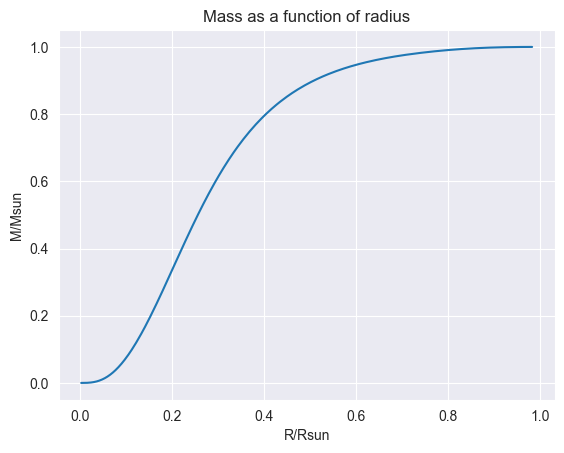

In [54]:
# Plot mass as a function of radius
plt.figure()
plt.title("Mass as a function of radius")
sns.lineplot(x=RADIUS_COLUMN, y=MASS_COLUMN, data=bp2000)

<Axes: title={'center': 'Pressure as a function of radius'}, xlabel='R/Rsun', ylabel='P'>

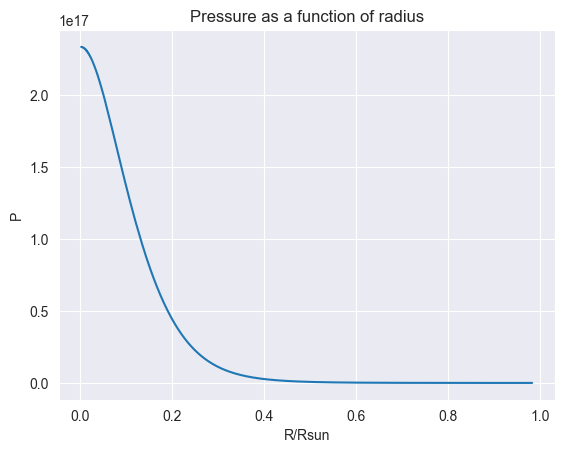

In [55]:
# Plot pressure as a function of radius
plt.figure()
plt.title("Pressure as a function of radius")
sns.lineplot(x=RADIUS_COLUMN, y=PRESSURE_COLUMN, data=bp2000)


<Axes: title={'center': 'Temperature as a function of radius'}, xlabel='R/Rsun', ylabel='T'>

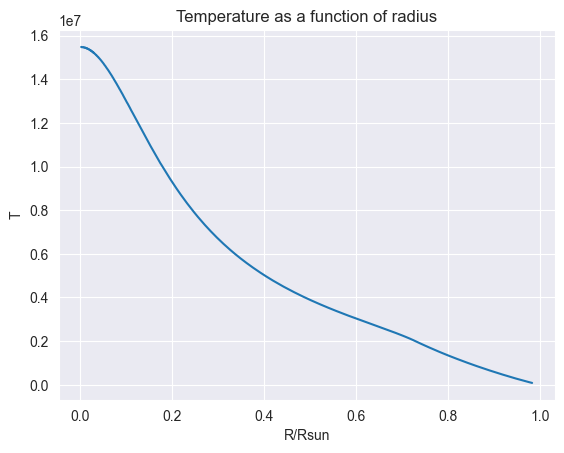

In [56]:
# Plot temperature as a function of radius
plt.figure()
plt.title("Temperature as a function of radius")
sns.lineplot(x=RADIUS_COLUMN, y=TEMPERATURE_COLUMN, data=bp2000)

# Part 2

<Axes: title={'center': 'Density as a function of radius'}, xlabel='R/Rsun', ylabel='Rho'>

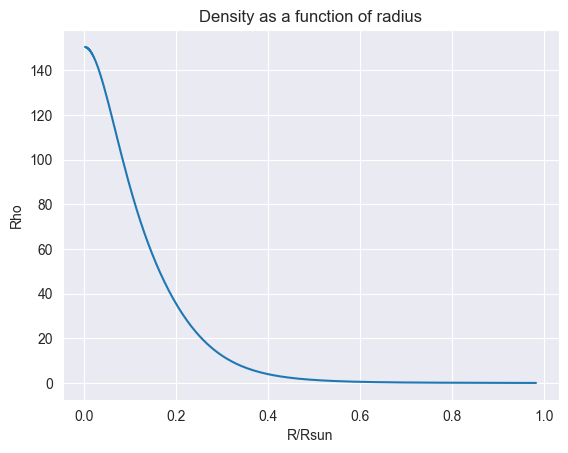

In [57]:
# Density as a function of radius
plt.figure()
plt.title("Density as a function of radius")
sns.lineplot(x=RADIUS_COLUMN, y=DENSITY_COLUMN, data=bp2000)

<Axes: title={'center': 'Mass function (X and Y) as a function of radius'}, xlabel='R/Rsun', ylabel='X'>

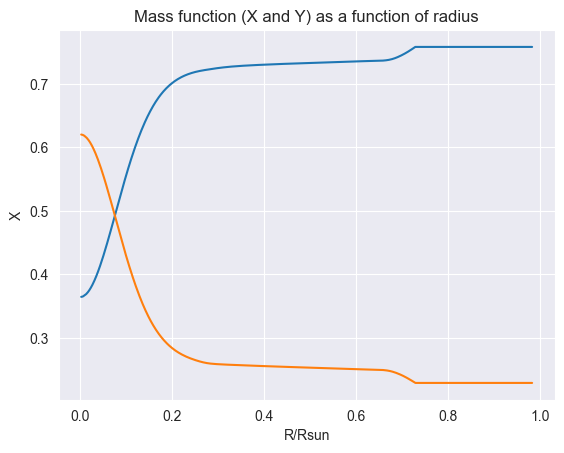

In [58]:
# Mass functionx (X and Y) as a function of radius
plt.figure()
plt.title("Mass function (X and Y) as a function of radius")
sns.lineplot(x=RADIUS_COLUMN, y=X_COLUMN, data=bp2000)
sns.lineplot(x=RADIUS_COLUMN, y=Y_COLUMN, data=bp2000)

/var/folders/fb/xb26b7pj5_933srbq0z1j63w0000gp/T/ipykernel_81100/3721210546.py:79: RuntimeWarning: invalid value encountered in divide
  plt.plot(xi_n1, np.sin(xi_n1)/xi_n1, label='n = 1')


Text(0.5, 1.0, 'Solutions to the Lane-Emden Equation')

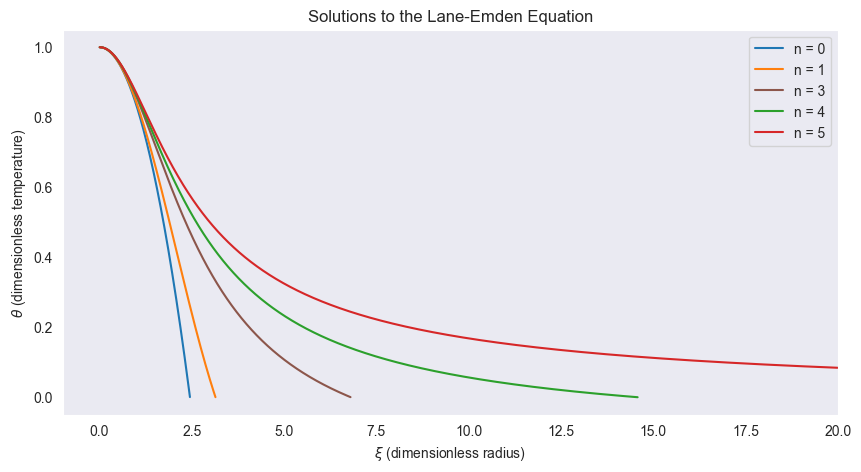

In [59]:
# Lane-Emden equation solver and visualization functions

def solve_lane_emden(log_delta_xi=-4, n=3):
    """
    Solves the Lane-Emden equation using a predictor-corrector numerical method.
    
    The Lane-Emden equation describes the internal structure of a polytropic star:
    (1/xi^2) * d/dxi(xi^2 * dtheta/dxi) + theta^n = 0
    
    Args:
        log_delta_xi (float): Log of step size for numerical integration
        n (int): Polytropic index
        
    Returns:
        tuple: (xi values, primitive solutions, corrected solutions)
    """
    # Convert log step size to linear
    delta_xi = 10**log_delta_xi
    
    # Initial conditions at small xi, using Taylor expansion
    # theta(0) = 1, dtheta/dxi(0) = 0
    y0 = 1 - delta_xi**2/6  # theta 
    z0 = -delta_xi**3/3     # dtheta/dxi
    
    # Initialize solution arrays
    xi_values = [delta_xi]
    primitive_solutions = [y0]  # Using primitive method
    primitive_derivatives = [z0]
    corrected_solutions = [y0]  # Using predictor-corrector
    corrected_derivatives = [z0]
    
    while True:
        # Get current values
        y = primitive_solutions[-1]
        z = primitive_derivatives[-1]
        xi = xi_values[-1]
        y_corrected = corrected_solutions[-1]
        z_corrected = corrected_derivatives[-1]
        
        # Primitive (Euler) method step
        y_next = y + delta_xi * z/xi**2
        z_next = z + delta_xi * (-xi**2 * y**n)
        
        # Predictor-corrector improvement
        xi_next = xi + delta_xi
        y_corrected_next = y_corrected + 0.5 * delta_xi * (z/xi**2 + z_next/xi_next**2)
        z_corrected_next = z_corrected + 0.5 * delta_xi * (-xi**2*y**n - xi_next**2*y_next**n)
        
        # Stop when solution approaches zero (star surface)
        if y_next < 1e-10 or y_corrected_next < 1e-10:
            break
            
        # Store results
        xi_values.append(xi_next)
        primitive_solutions.append(y_next)
        primitive_derivatives.append(z_next)
        corrected_solutions.append(y_corrected_next)
        corrected_derivatives.append(z_corrected_next)
    
    return (xi_values, primitive_solutions, corrected_solutions)

def plot_lane_emden(log_delta_xi=-2, n=3):
    """
    Plots solutions to the Lane-Emden equation for different polytropic indices.
    
    Args:
        log_delta_xi (float): Log of step size passed to solver
        n (int): Polytropic index for numerical solution
    """
    # Get numerical solution
    xi_values, _, corrected_solutions = solve_lane_emden(log_delta_xi, n)
    
    # Plot analytical solution for n=0 (constant density star)
    xi_n0 = np.arange(0, np.sqrt(6), 1e-3)
    plt.plot(xi_n0, 1-xi_n0**2/6, label='n = 0')
    
    # Plot analytical solution for n=1 
    xi_n1 = np.arange(0, np.pi, 1e-3)
    plt.plot(xi_n1, np.sin(xi_n1)/xi_n1, label='n = 1')
    
    # Plot numerical solution for n=3
    plt.plot(xi_values, corrected_solutions, 'tab:brown', label='n = 3')
    
    plt.legend(loc='best')
    plt.xlabel(r'$\xi$ (dimensionless radius)')
    plt.ylabel(r'$\theta$ (dimensionless temperature)')
    plt.grid()

# Solve and plot for higher polytropic indices
# Get solutions for n=4 and n=5
xi_n4, _, solutions_n4 = solve_lane_emden(log_delta_xi=-2, n=4)
xi_n5, _, solutions_n5 = solve_lane_emden(log_delta_xi=-2, n=5)

# Create figure and plot all solutions
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_lane_emden(-2, 3)

# Add n=4 and n=5 solutions
ax.plot(xi_n4, solutions_n4, label="n = 4")
ax.plot(xi_n5, solutions_n5, label="n = 5")

# Adjust plot aesthetics
ax.set_xlim(-1, 20)  # Show full range of solutions
ax.legend()
ax.set_title('Solutions to the Lane-Emden Equation')

The dimensionless function $\theta$ relates density to radius through:
$$
[\theta_n(r)]^n = \frac{\rho(r)}{\rho_c}
$$
where n is the polytropic index and $\rho_c$ is the central density. The dimensionless radius $\xi$ is defined as:
$$
\xi = \frac{r}{\alpha}, \quad \alpha^2 = \frac{(n+1)P_c}{4\pi G \rho_c^2}
$$
The function $\theta(r)$ satisfies $\theta(0)=1$ and $\theta(1)=0$ since it represents the density ratio.

As n increases, the density profile changes - n=0 gives constant density, while higher n values produce steeper density gradients, as shown in the plot above.

*Lane-Emden solution code adapted from [Earl Bellinger, Stellar Astrophysics Centre, Denmark](https://github.com/earlbellinger/Lane-Emden/blob/master/Lane-Emden.ipynb)*

## Part 3

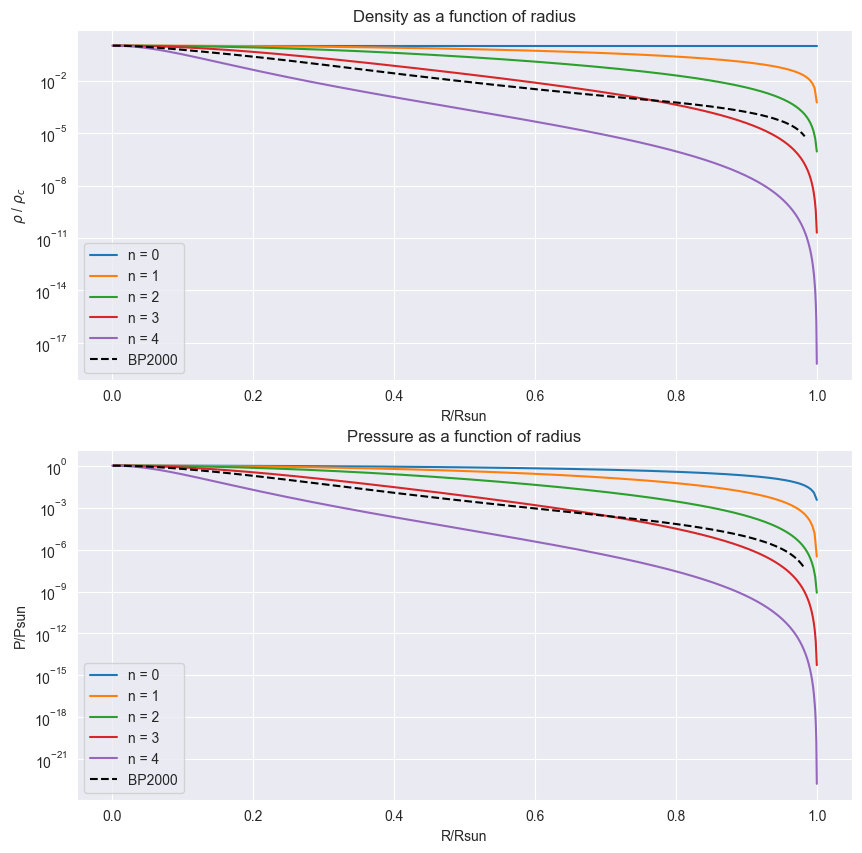

In [81]:
# Create a figure with two subplots for comparing density and pressure profiles
# between Lane-Emden solutions and BP2000 model
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10))


def calculate_density_ratio(n: float, theta: np.ndarray) -> np.ndarray:
    """
    Calculate the density ratio ρ/ρc from Lane-Emden solution.

    Args:
        n: polytropic index
        theta: dimensionless temperature from Lane-Emden solution

    Returns:
        Array of density ratios ρ/ρc = θ^n
    """
    return theta**n


def calculate_pressure_ratio(n: float, theta: np.ndarray) -> np.ndarray:
    """
    Calculate the pressure ratio P/Pc from Lane-Emden solution.

    Args:
        n: polytropic index
        theta: dimensionless temperature from Lane-Emden solution

    Returns:
        Array of pressure ratios P/Pc = θ^(n+1)
    """
    return theta ** (n + 1)


def normalize_radius(xi: np.ndarray, theta: np.ndarray) -> list:
    """
    Normalize the dimensionless radius ξ by the stellar radius.

    Args:
        xi: dimensionless radius coordinate
        theta: dimensionless temperature

    Returns:
        List of normalized radii r/R from center to surface
    """
    # Find surface where θ = 0
    surface_index = np.argmin(np.abs(theta))
    stellar_radius = xi[surface_index]
    # Normalize all radii by stellar radius
    return [x / stellar_radius for x in xi[: surface_index + 1]]


# Plot Lane-Emden solutions for different polytropic indices
polytropic_indices = np.arange(0, 5)
for n in polytropic_indices:
    # Solve Lane-Emden equation for this index
    xi_values, _, theta_values = solve_lane_emden(-2, n)

    # Calculate normalized profiles
    r_normalized = normalize_radius(xi_values, theta_values)
    rho_normalized = calculate_density_ratio(n, theta_values)
    p_normalized = calculate_pressure_ratio(n, theta_values)

    # Plot density profile
    ax1.plot(r_normalized, rho_normalized, label=f"n = {n}")
    # Plot pressure profile
    ax2.plot(r_normalized, p_normalized, label=f"n = {n}")

# Calculate BP2000 model ratios relative to central values
bp2000_density_ratio = bp2000["Rho"] / bp2000["Rho"][0]
bp2000_pressure_ratio = bp2000["P"] / bp2000["P"][0]

# Configure density plot
ax1.plot(bp2000["R/Rsun"], bp2000_density_ratio, "k--", label="BP2000")
ax1.set_title("Density as a function of radius")
ax1.set_xlabel("R/Rsun")
ax1.set_ylabel(r"$\rho$ / $\rho_c$")  # LaTeX formatting for ratio
ax1.grid(True)
ax1.semilogy()  # Use log scale for y-axis
ax1.legend()

# Configure pressure plot
ax2.plot(bp2000["R/Rsun"], bp2000_pressure_ratio, "k--", label="BP2000")
ax2.set_title("Pressure as a function of radius")
ax2.set_xlabel("R/Rsun")
ax2.set_ylabel("P/Psun")
ax2.grid(True)
ax2.semilogy()  # Use log scale for y-axis
ax2.legend()

The n = 3 Lane-Emden solution best matches the BP2000 solar model among integer indices. Note that n = 0 appears as a horizontal line at $\rho / \rho_c = 1$ since it represents a constant density profile.